In [1]:
# Import needed libraries 
import pandas as pd 
import os
from datetime import timedelta
import numpy as np 
from scipy.signal import argrelextrema
import alpaca_trade_api as tradeapi 
import matplotlib.pyplot as plt 
import matplotlib.dates as mpdates
from mplfinance.original_flavor import candlestick_ohlc
from dotenv import load_dotenv

# Ignore any non-critical future warnings

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:

# Load .env file

load_dotenv()

True

In [3]:
# Set Alpaca API key and secret passwords

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [4]:
# Initiate REST API

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [5]:
# Set the ticker
ticker = "QQQ"

# Set timeframe to "1 Minute"
timeframe = "5Min"

# Set start and end datetimes of 3 years from Today
start_date = pd.Timestamp("2021-01-22", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-01-23", tz="America/New_York").isoformat()

# Get 3 years worth of historical data for TSLA
ticker_data = api.get_bars(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
).df

display(ticker_data.head())
display(ticker_data.tail())

,close,high,low,trade_count,open,volume,vwap
timestamp,,,,,,,
2021-01-22 09:00:00+00:00,325.12,325.21,325.09,46,325.21,6620,325.149352
2021-01-22 09:05:00+00:00,325.00,325.07,324.90,42,325.07,4504,324.967182
2021-01-22 09:10:00+00:00,324.95,325.04,324.94,19,325.03,4664,324.967024
2021-01-22 09:15:00+00:00,324.89,324.98,324.89,28,324.95,6945,324.909834
2021-01-22 09:20:00+00:00,324.98,325.01,324.85,23,324.89,3563,324.922919


,close,high,low,trade_count,open,volume,vwap
timestamp,,,,,,,
2021-01-22 22:35:00+00:00,325.38,325.42,325.37,70,325.41,26394,325.413173
2021-01-22 22:40:00+00:00,325.34,325.40,325.34,69,325.40,1272,325.380024
2021-01-22 22:45:00+00:00,325.32,325.42,325.32,16,325.42,50379,325.419462
2021-01-22 22:50:00+00:00,325.40,325.40,325.30,58,325.33,9575,325.358111
2021-01-22 22:55:00+00:00,325.40,325.40,325.40,10,325.40,1660,325.400000


In [6]:
#dropping trade_count and vwap column
updated_ticker_data = ticker_data.drop(columns=['trade_count', 'vwap'])

#checking results
updated_ticker_data

,close,high,low,open,volume
timestamp,,,,,
2021-01-22 09:00:00+00:00,325.12,325.21,325.09,325.21,6620
2021-01-22 09:05:00+00:00,325.00,325.07,324.90,325.07,4504
2021-01-22 09:10:00+00:00,324.95,325.04,324.94,325.03,4664
2021-01-22 09:15:00+00:00,324.89,324.98,324.89,324.95,6945
2021-01-22 09:20:00+00:00,324.98,325.01,324.85,324.89,3563
...,...,...,...,...,...
2021-01-22 22:35:00+00:00,325.38,325.42,325.37,325.41,26394
2021-01-22 22:40:00+00:00,325.34,325.40,325.34,325.40,1272
2021-01-22 22:45:00+00:00,325.32,325.42,325.32,325.42,50379


In [7]:
updated_ticker_data = updated_ticker_data.dropna()

In [8]:
# Convert the index to datetime
updated_ticker_data.index = pd.to_datetime(updated_ticker_data.index)

c:\Users\JamesDavidson\Anaconda3\envs\mlenv\lib\site-packages\numpy\lib\polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
c:\Users\JamesDavidson\Anaconda3\envs\mlenv\lib\site-packages\numpy\core\_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
C:\Users\JamesDavidson\AppData\Local\Temp\ipykernel_30448\728260998.py:11: RankWarning: Polyfit may be poorly conditioned
  polynomial_coefficients = np.polyfit(x_data, updated_ticker_data['close'][:min_length], polynomial_degree)


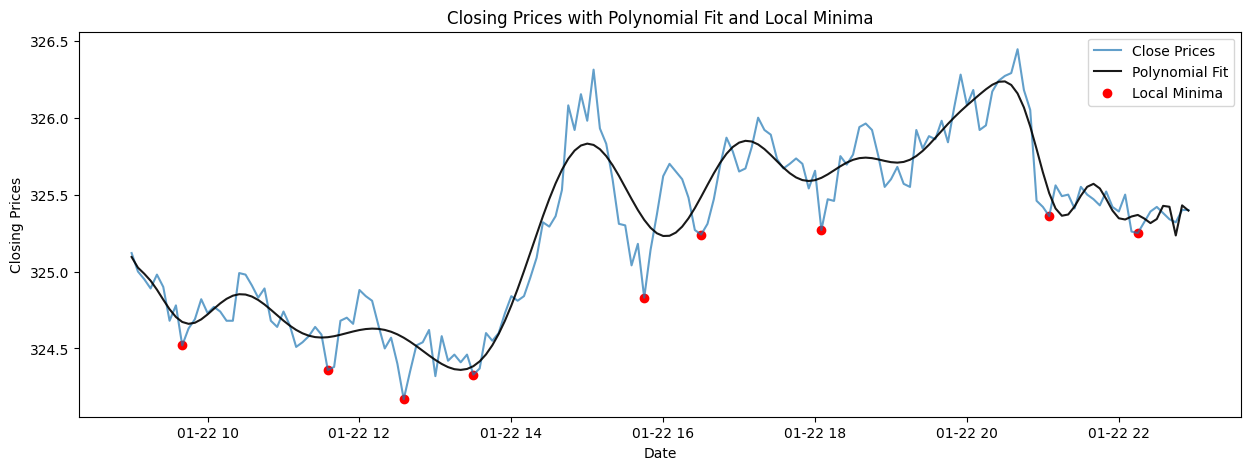

In [9]:
# Plot the stock data, polynomial fit, and local minima
plt.figure(figsize=(15, 5))

# Plot the close prices
min_length = min(len(updated_ticker_data.index), len(updated_ticker_data['close']))
plt.plot(updated_ticker_data.index[:min_length], updated_ticker_data['close'][:min_length], label='Close Prices', alpha=0.7)

# Polynomial fit
x_data = np.arange(min_length)
polynomial_degree = 100  # Adjust as needed
polynomial_coefficients = np.polyfit(x_data, updated_ticker_data['close'][:min_length], polynomial_degree)
y_polynomial = np.polyval(polynomial_coefficients, x_data)

# Plot the polynomial fit
plt.plot(updated_ticker_data.index[:min_length], y_polynomial, '-', markersize=1.0, color='black', alpha=0.9, label='Polynomial Fit')

# Find local minima indices using scipy's argrelextrema
minima_indices = argrelextrema(updated_ticker_data['close'].values[:min_length], np.less, order=5)[0]

# Plot red dots at local minima
plt.scatter(updated_ticker_data.index[minima_indices], updated_ticker_data['close'].iloc[minima_indices], color='red', label='Local Minima')

plt.title('Closing Prices with Polynomial Fit and Local Minima')
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.legend()
plt.show()

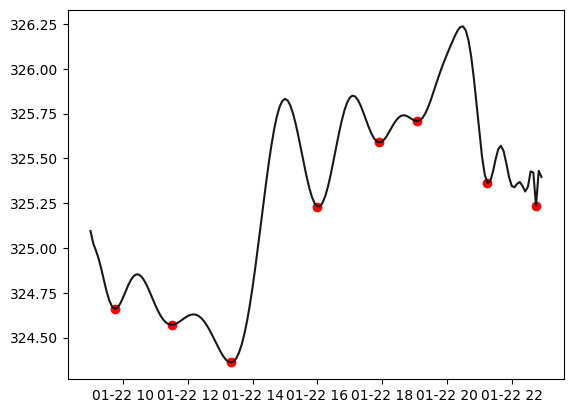

In [10]:
local_poly_minima = argrelextrema(y_polynomial, np.less, order=5)[0]

# Plot polynomial fit
plt.plot(updated_ticker_data.index[:min_length], y_polynomial, '-', markersize=1.0, color='black', alpha=0.9, label='Polynomial Fit')

# Plot red dots at local minima
plt.scatter(updated_ticker_data.index[local_poly_minima], y_polynomial[local_poly_minima], color='red', label='Local Minima')

C:\Users\JamesDavidson\AppData\Local\Temp\ipykernel_30448\4196894819.py:11: RankWarning: Polyfit may be poorly conditioned
  polynomial_coefficients = np.polyfit(x_data, updated_ticker_data['close'][:min_length], polynomial_degree)


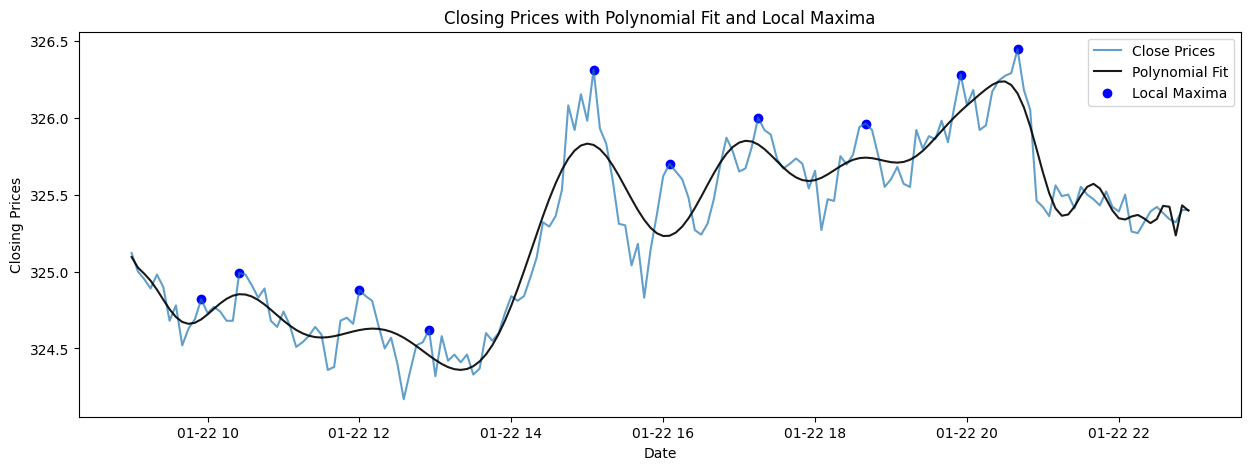

In [11]:
# Plot the stock data, polynomial fit, and local minima and maxima
plt.figure(figsize=(15, 5))

# Plot the close prices
min_length = min(len(updated_ticker_data.index), len(updated_ticker_data['close']))
plt.plot(updated_ticker_data.index[:min_length], updated_ticker_data['close'][:min_length], label='Close Prices', alpha=0.7)

# Polynomial fit
x_data = np.arange(min_length)
polynomial_degree = 100  # Adjust as needed
polynomial_coefficients = np.polyfit(x_data, updated_ticker_data['close'][:min_length], polynomial_degree)
y_polynomial = np.polyval(polynomial_coefficients, x_data)

# Plot the polynomial fit
plt.plot(updated_ticker_data.index[:min_length], y_polynomial, '-', markersize=1.0, color='black', alpha=0.9, label='Polynomial Fit')

# Find local maxima indices using scipy's argrelextrema
maxima_indices = argrelextrema(updated_ticker_data['close'].values[:min_length], np.greater, order=5)[0]

# Plot blue dots at local maxima
plt.scatter(updated_ticker_data.index[maxima_indices], updated_ticker_data['close'].iloc[maxima_indices], color='blue', label='Local Maxima')

plt.title('Closing Prices with Polynomial Fit and Local Maxima')
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.legend()
plt.show()

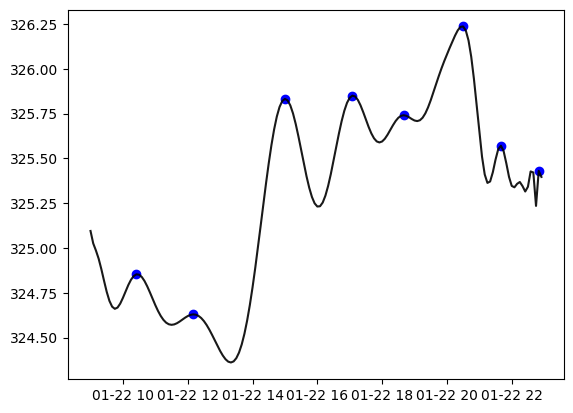

In [12]:
local_poly_maxima = argrelextrema(y_polynomial, np.greater, order=5)[0]

# Plot polynomial fit
plt.plot(updated_ticker_data.index[:min_length], y_polynomial, '-', markersize=1.0, color='black', alpha=0.9, label='Polynomial Fit')

plt.scatter(updated_ticker_data.index[local_poly_maxima],y_polynomial[local_poly_maxima], color="blue", label = "Local Maxima")

In [13]:
poly_df = pd.DataFrame(y_polynomial)
columns = ['poly_fit']
poly_df.columns = columns
poly_df.head()

,poly_fit
0,325.094530
1,325.025247
2,324.985596
3,324.940397
4,324.882296


In [14]:
updated_ticker_data.reset_index(inplace=True)
updated_ticker_data.head()

,timestamp,close,high,low,open,volume
0,2021-01-22 09:00:00+00:00,325.12,325.21,325.09,325.21,6620
1,2021-01-22 09:05:00+00:00,325.00,325.07,324.90,325.07,4504
2,2021-01-22 09:10:00+00:00,324.95,325.04,324.94,325.03,4664
3,2021-01-22 09:15:00+00:00,324.89,324.98,324.89,324.95,6945
4,2021-01-22 09:20:00+00:00,324.98,325.01,324.85,324.89,3563


In [16]:
updated_ticker_data = pd.concat([updated_ticker_data, poly_df], axis='columns', join='outer')

updated_ticker_data.head()

,timestamp,close,high,low,open,volume,poly_fit,poly_fit
0,2021-01-22 09:00:00+00:00,325.12,325.21,325.09,325.21,6620,325.094530,325.094530
1,2021-01-22 09:05:00+00:00,325.00,325.07,324.90,325.07,4504,325.025247,325.025247
2,2021-01-22 09:10:00+00:00,324.95,325.04,324.94,325.03,4664,324.985596,324.985596
3,2021-01-22 09:15:00+00:00,324.89,324.98,324.89,324.95,6945,324.940397,324.940397
4,2021-01-22 09:20:00+00:00,324.98,325.01,324.85,324.89,3563,324.882296,324.882296


array([ 11,  17,  36,  47,  73,  85,  99, 116, 131, 140], dtype=int64)